<center>
    <h3>University of Toronto</h3>
    <h3>Department of Mechanical and Industrial Engineering</h3>
    <h3>MIE368 Analytics in Action </h3>
    <h3>(Fall 2022)</h3>
    <hr>
    <h1>Lab 5: Predict then Optimize </h1>
    <h3>October 19, 2022</h3>
</center>


# Introduction
In this lab we investigate how we can combine prediction models (predictive analytics) with optimization models (prescriptive analytics). The power of prescriptive analytics is that we can begin to influence decision-making! In this lab, we will look at a real world application of combining these two approaches. 

There are two high level modelling choices we can follow when designing a predict-then-optimize pipeline:


1.   Use the $\beta$ values from a model such as linear regression as coefficients in an optimization model
2.   Use the actual predicted values, i.e. $\hat{y}$, from a model like logistic regression as coefficients in an optimization model






### Exercises

1. Concisely explain the difference between predictive and prescriptive analytics.

___
__Question 1 Answer__:

___

2. You create a model that *determines how much traffic will be present during your drive to work.* Would that model fall under predictive or prescriptive analytics? Why?

___
__Question 2 Answer__:

___

3. You create a model that *determines the best route to take to work by avoiding traffic*. Would that model fall under predictive or prescriptive analytics? Why? 

___
__Question 3 Answer__:
___

# Application: Wheelchair Rugby (WCR)

In this lab, we will use a dataset describing Canada's paralympic wheelchair rugby team. It became an official paralympic sport in Sydney in 2000, and was originally called "*murder ball*"! It is highly recommended that you watch the following short 2 minute video going over the rules of wheelchair rugby. This should provide a good understanding for the lab, while also being quite interesting :)


<a href="https://www.youtube.com/watch?v=tSzFmlWgVsM&feature=emb_logo&ab_channel=ParalympicGames" target=""><img src="http://i3.ytimg.com/vi/tSzFmlWgVsM/hqdefault.jpg" 
alt="" width="240" height="180" border="10" /></a>


There are two main features to wheelchair rugby that are important to highlight:


1.   Each player on the team will have a phyical ability rating of one of the following values: {3.5, 3.0, 2.5, 2.0, 1.5, 1.0, 0.5, 0.0}. Note, this takes into account men's and women's slightly different rating systems. The higher the rating, the more mobility they have with their body.
2.   Teams must have four players on the court at any time. The sum of the physical ability ratings of those players on the court cannot exceed 8. 





### Exercises

1. Based on the video, which physical rating is more likely to be the goal scorers on a wheelchair rugby team?

  ___
 __Question 1 Answer__:

___

The second important feature we highlighted above should remind us of an optimization concept we learned recently: knapsack constraints. At first glance, it seems like there is room to gain a competitive advantage by building optimal lineups that maximize value while adhering to this enforced knapsack constraint. 

What exactly is the value/metric that we should try to optimize though? Lets do a quick review on *adjusted plus/minus*, a metric frequently used in sports statistics. 

# Adjusted Plus/Minus (APM)


 We begin with some important terms to know to help understand (APM):

*   **Stint**: A stint is a period of time with the same players on the court (i.e., no substitutions are made and no end of quarter break is present within the stint). 
*   **Plus-Minus (+/-)**: The score differential for a player when they are on the court, typically normalized by playing time or possessions. This can be calculated across any window of time (e.g. quarters, games, seasons, etc.).  For our purposes, we calculate plus-minus at the stint level and normalize by minutes.  A major limitation of this statistic is that it does not account for the quality of the other players on the court during the stint.

Here we provide an illustrative example of raw plus-minus. Consider a mini-version of wheelchair rugby where each team has three players and only two are allowed on the court at any one time. We will identify the players as A1, A2, and A3 for Team A (home team), and B1, B2,and B3 for Team B (away team). Consider the following five stints:

1.   A1, A2, vs. B1, B2 resulted in a score of 11-5 over 4 minutes
2.   A1, A3, vs. B2, B3 resulted in a score of 4-9 over 5 minutes
3.   A2, A3, vs. B1, B3 resulted in a score of 8-10 over 4 minutes
4.   A2, A3, vs. B2, B3 resulted in a score of 3-1 over 2 minutes
5.   A1, A3, vs. B1, B3 resulted in a score of 7-8 over 5 minutes

Let's consider the raw plus-minus for player A2. The first time A2 was on the court, stint 1, the normalized plus-minus was $6/4$, or 1.5. The second time was in stint 3, in which the normalized plus-minus was $-0.5$. The last time was in stint 4, where the normalized plus-minus was $1.0$. Overall, A2's plus-minus per minute would be 2. Was A2 really the driving factor in Team A earning a $+2$ score differential over the ten minutes A2 played? Or did A2 just happen to be on the court when the other players on Team A were the real contributors? 

The intuition behind adjusted plus-minus is to "adjust", or "correct", or "distributed" a player's raw plus-minus value based on the additional information of who they played with, as given by their collection of stints. One way to operationalize this adjustment is via a linear regression model.
    
The target (i.e., response variable), denoted $y_i$, is the score differential between the home team and the away team during stint $i$, normalized by the number of minutes in that stint. This is the raw plus-minus value of that stint (not of the player). The features (i.e., dependent variables), denoted $X_{ij}$, indicate whether player $j$ is on the court during stint $i$, constructed to differentiate home players from away players. Specifically:

\begin{align}
X_{ij} = \begin{cases} 
    1,  &\text{if player } j \text{ is on-court for the home team during stint } i \\
    -1,  &\text{if player } j \text{ is on-court for the away team during stint } i\\
    0,  &\text{otherwise.} 
\end{cases}
\end{align}

Putting this together in a linear model, we have

\begin{align}
    y_{i} &= \sum_{j=1}^6 \beta_{j} X_{ij} + \epsilon_i 
\end{align} 

where the residual, denoted $\epsilon_i$, is assumed to follow a zero-mean Gaussian distribution with variance $\sigma^2$.  Plugging in the data from the stints above into this model, we have:  

\begin{align*}
1.5 = \beta_{A1} + \beta_{A2} - \beta_{B1} - \beta_{B2}  + \epsilon_1 \\
-1 = \beta_{A1} + \beta_{A3} - \beta_{B2} - \beta_{B3} + \epsilon_2 \\
-0.5 = \beta_{A2} + \beta_{A3} - \beta_{B1} -  \beta_{B3} + \epsilon_3 \\
1 = \beta_{A2} + \beta_{A3} - \beta_{B2} -  \beta_{B3} + \epsilon_4 \\
-0.2 = \beta_{A2} + \beta_{A3} - \beta_{B1} -  \beta_{B3} + \epsilon_5
\end{align*}

With a few more stints, this model could be fit using least squares (other estimators could also be used). However, note that having knowledge of whether any two players from a team are on the court fully determines whether the third player on that team is on the court (leading to multicollinearity). This is easy to remedy, but for this lab, we will ignore it for brevity.

# Exploratory Data Analysis

We now import and explore the stint data for the Olympic teams of various countries as well as another dataframe outlining each country's roster.

In [ ]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
import cvxpy as cp

# Load dataset
stint_df = pd.read_csv('https://docs.google.com/uc?export=download&id=1ZTXveMviFN7tFcH--BSfvfs7jPWtP95h') 
stint_df.head() # prints the first 5 rows of the dataframe 

,game_id,h_team,a_team,minutes,h_goals,a_goals,home1,home2,home3,home4,away1,away2,away3,away4
0,1,USA,Japan,4.252969,4,9,USA_p4,USA_p1,USA_p3,USA_p6,Japan_p12,Japan_p4,Japan_p8,Japan_p6
1,1,USA,Japan,5.688809,6,11,USA_p1,USA_p7,USA_p6,USA_p5,Japan_p7,Japan_p10,Japan_p8,Japan_p12
2,1,USA,Japan,1.149557,0,1,USA_p8,USA_p1,USA_p4,USA_p5,Japan_p5,Japan_p3,Japan_p7,Japan_p10
3,1,USA,Japan,3.511617,7,5,USA_p2,USA_p7,USA_p8,USA_p6,Japan_p2,Japan_p4,Japan_p10,Japan_p12
4,1,USA,Japan,2.163139,7,5,USA_p9,USA_p5,USA_p8,USA_p7,Japan_p8,Japan_p6,Japan_p10,Japan_p1


The table below contains the data dictionary.

|Feature          |Definition                                             |
|:---------------:|:------------------------------------------------------|
|gamed_id           | Identifier for game id                  |
|h_team            |Home team |    
|a_team      |Away team |
|minutes    |number of minutes of each stint|
|h_goals  |number of goals the home team scored in this stint                   | 
|a_goals  |number of goals the away team scored in this stint
|home1  |The name of the first player on the home team on the court                        
|...             |              | 
|home4  |The name of the fourth player on the home team on the court |
|away1  |The name of the first player on the away team on the court                        
|...             |              | 
|away4  |The name of the fourth player on the away team on the court |


In [ ]:
player_df = pd.read_csv('https://docs.google.com/uc?export=download&id=1YbyKy_WrY2A1PbPCTe6QGvGI2T5krr5f') 
player_df

,player,rating
0,USA_p1,3.0
1,USA_p2,3.0
2,USA_p3,3.5
3,USA_p4,0.0
4,USA_p5,2.0
...,...,...
139,Chile_p8,2.0
140,Chile_p9,0.5
141,Chile_p10,0.5
142,Chile_p11,0.0


### Exercises

1. How many stints are in the dataset?

In [ ]:
len(stint_df)

7448

In [ ]:
# Write your code here.  

# -------------------


# -------------------

2. Create a histogram using `sns.displot` to show the distribution of player physical ratings in the dataset. Hint, specify the bins to be: ``bins=[-0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75]``

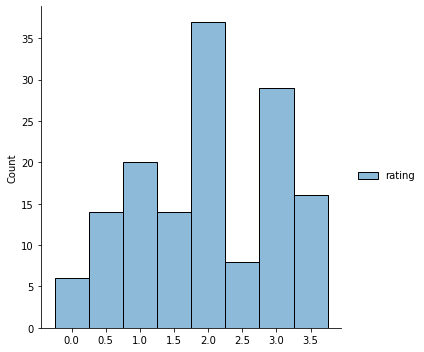

In [ ]:
sns.displot(player_df, bins=[-0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75])

In [ ]:
# Write your code here.  

# -------------------


# -------------------

3. What is the average number of goals scored per game (away + home)?

In [ ]:
np.sum(stint_df.h_goals + stint_df.a_goals)/len(pd.unique(stint_df['game_id']))

99.59848484848484

In [ ]:
# Write your code here.  

# -------------------


# -------------------

4. Does the home team win more often? If so, how much more often? You can check this by comparing the home goals vs away goals. What do you think this signifies?



In [ ]:
np.mean(stint_df.groupby('game_id').sum()['h_goals'] > stint_df.groupby('game_id').sum()['a_goals'])

0.5712121212121212

In [ ]:
# Write your code here.  

# -------------------


# -------------------

## Raw Plus Minus
Next we want to determine the raw plus-minus for each athlete. To do so, we compute the total plus-minus for all stints each player is a part of, and then divide by the total number of minutes. This allows for a normalized value for each player. We provide the code to compute this and append it to `player_df` - just run the following code block. You do NOT need to know how this code works (it will take 1-2 minutes to run), but try to understand what raw plus minus means. 


In [ ]:
# Iterate through each stint and assign the plus-minus and minutes played to each athlete that played
stint_df["h_plus_minus"] = stint_df["h_goals"] - stint_df["a_goals"]
stint_df["a_plus_minus"] = -1*stint_df["h_plus_minus"]
player_df["minutes"] = 0
player_df["plus_minus"] = 0
player_cols = ["home1", "home2", "home3", "home4", "away1", "away2", "away3", "away4"]
for stint in stint_df.itertuples():
    for player in player_cols:
        player_df.loc[player_df["player"] == getattr(stint, player), "minutes"] += stint.minutes
        if player[0] == "h":
            player_df.loc[player_df["player"] == getattr(stint, player), "plus_minus"] += stint.h_plus_minus
        elif player[0] == "a":
            player_df.loc[player_df["player"] == getattr(stint, player), "plus_minus"] += stint.a_plus_minus
player_df["plus_minus_per_minute"] = player_df["plus_minus"] / player_df["minutes"]

# Get each athlete's team
player_df["team"] = player_df["player"].str.split('_').str[0]

# print the updated player_df to compute the plus-minus
player_df

,player,rating,minutes,plus_minus,plus_minus_per_minute,team
0,USA_p1,3.0,1155.774143,496,0.429150,USA
1,USA_p2,3.0,1067.953325,104,0.097383,USA
2,USA_p3,3.5,888.478357,285,0.320773,USA
3,USA_p4,0.0,1421.401843,136,0.095680,USA
4,USA_p5,2.0,1039.289768,275,0.264604,USA
...,...,...,...,...,...,...
139,Chile_p8,2.0,1279.232553,-559,-0.436981,Chile
140,Chile_p9,0.5,568.122684,-169,-0.297471,Chile
141,Chile_p10,0.5,583.832171,-416,-0.712534,Chile
142,Chile_p11,0.0,730.248998,-234,-0.320439,Chile


### Exercises

1. Create a boxplot (use ``sns.boxplot()``) that shows the relationship between raw plus minus versus physical rating. Is there any relationship between raw plus minus and physical rating?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


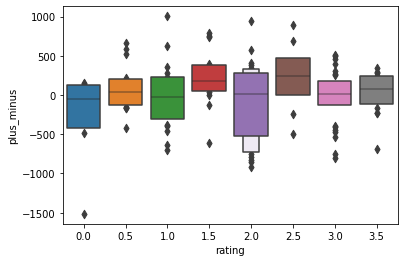

In [ ]:
sns.boxenplot(player_df.rating, player_df.plus_minus)

In [ ]:
# Write your code here.  

# -------------------


# -------------------

# Phase One: Prediction

We now begin the first phase of our predict-then-optimize framework. Run the following code block to load the ``X`` and ``y`` dataframes. 

Reminder, for APM, we will use regression to try to "distribute" the plus-minus-per-minute of **each stint** to the players **in that stint**, with an extra intercept parameter and error parameter. That is, we solve the following:

\begin{align}
    y_{i} &= \alpha + \sum_{j} \beta_{j} X_{ij} + \epsilon_i \\
    \epsilon_i &\sim N(0, \sigma^2) 
\end{align}

To solve for the $\beta$ values in $APM$ calculations, it is common practice to use Ridge regression (i.e., L-2 Regularization, see Lab One for more information). If you are curious as to why we choose Ridge regression, the last few sections of [this blog post](https://squared2020.com/2017/09/18/deep-dive-on-regularized-adjusted-plus-minus-i-introductory-example/) provides the rationale. 

Note that we will face one major limitation - models that use $APM$ generally suffer from multicollinearity. We will ignore that issue for the sake of brevity in the lab, however, it is something you should consider more seriously in your projects.

Note, the `X` matrix indicates who was on the court (home and away) for each stint. Specifically:

\begin{align}
X_{ij} = \begin{cases} 
    1,  &\text{if player } j \text{ is on-court for the home team during stint } i \\
    -1,  &\text{if player } j \text{ is on-court for the away team during stint } i\\
    0,  &\text{otherwise.} 
\end{cases}
\end{align}

Run the following code block to build the `X` matrix. You don't need to understand the code syntax, BUT you should understand what the `X` matrix includes for this model.

In [ ]:
X = pd.DataFrame(columns=player_df['player'].tolist())

player_cols = ["home1", "home2", "home3", "home4", "away1", "away2", "away3", "away4"]
# Iterate through each stint
for i, stint in enumerate(stint_df.itertuples()):
    for player in player_cols:
        # record players
        if player[0] == "h":
            X.loc[i, getattr(stint, player)] = 1
        elif player[0] == "a":
            X.loc[i, getattr(stint, player)] = -1
X.fillna(0, inplace=True)

X

,USA_p1,USA_p2,USA_p3,USA_p4,USA_p5,USA_p6,USA_p7,USA_p8,USA_p9,USA_p10,...,Chile_p3,Chile_p4,Chile_p5,Chile_p6,Chile_p7,Chile_p8,Chile_p9,Chile_p10,Chile_p11,Chile_p12
0,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7444,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
7445,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
7446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


For the `y` vector, it is the goal differential for that stint divided by the stint duration in minutes.

In [ ]:
y = (stint_df['h_goals'] - stint_df['a_goals'])/ stint_df['minutes']
y

0      -1.175649
1      -0.878919
2      -0.869901
3       0.569538
4       0.924582
          ...   
7443    1.548529
7444    0.962416
7445    1.876145
7446   -1.822401
7447    1.363385
Length: 7448, dtype: float64

### Exercises

1. Fit the model using `RidgeCV()` and report the $R^2$. Print out the beta estimates for all atheletes and add it as a column to the `player_df`. Which is the best player? Which is the worst?

 **IMPORTANT NOTE**: Since we are just doing information extraction, we do **NOT** need a training and testing set. This is because we will never be using our model to make future predictions on unseen or out-of-sample data. Instead, we are just trying to understand relationships from the data sample we do have.

2. Create a boxplot (use ``sns.boxplot()``) that shows the relationship between APM versus physical rating. Is there any relationship between APM and physical rating?

In [ ]:
ridge = RidgeCV()
ridge.fit(X, y)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [ ]:
ridge.score(X, y)

0.053649949472556524

In [ ]:
betas = pd.Series(ridge.coef_, index=X.columns)

In [ ]:
betas

USA_p1       0.377112
USA_p2       0.763537
USA_p3       1.198634
USA_p4      -1.059844
USA_p5      -0.316006
               ...   
Chile_p8    -0.121534
Chile_p9    -0.052437
Chile_p10   -0.544470
Chile_p11   -0.188868
Chile_p12    0.100525
Length: 144, dtype: float64

In [ ]:
# Write your code here for Exercise 2.  

# -------------------


# -------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


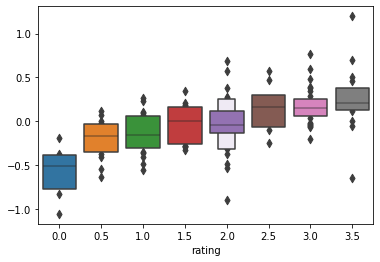

In [ ]:
sns.boxenplot(player_df.rating, betas.values)

In [ ]:
# Write your code here for Exercise 2.  

# -------------------



# -------------------

You should now see a more pronounced relationship between APM and physical rating! This is the wonder of analytics. At first glance, using raw-plus-minus didn't reveal any relationship. But with the right statistical modelling, the correct relationship appears!

### Exercises

1. What is the intercept value. Is it positive or negative. What do you think this signifies?

2. Create a DataFrame entitled `canada`, with columns for the player name, player physical ratings and APM values. Reset the index so it starts at 0. This df will be used in the second half of the lab.

In [ ]:
ridge.intercept_

0.06198108610265163

In [ ]:
canada = player_df[player_df['team']== 'Canada'].copy()

In [ ]:
canada['APM'] = betas[canada.player].values

In [ ]:
canada = canada[['player','rating', 'APM']]#, 'APM'

In [ ]:
canada

,player,rating,APM
36,Canada_p1,3.0,-0.055621
37,Canada_p2,0.0,-0.593319
38,Canada_p3,2.0,-0.259329
39,Canada_p4,2.0,-0.898633
40,Canada_p5,3.5,-0.652697
41,Canada_p6,1.5,0.175447
42,Canada_p7,3.0,0.205605
43,Canada_p8,3.5,-0.057446
44,Canada_p9,2.5,0.464783
45,Canada_p10,1.0,0.065154


___
**Question 1 answer:**

___


In [ ]:
# Write your code here for question 2.  

# -------------------


# -------------------

Now that we have Canada's APM values, or $\beta$ values, what should we do with them? Lets pretend that their was no knapsack constraint limiting the sum of the physical ratings of the players on the court to 8. Which four players would we always choose to play? We can easily say we'd choose the players with the highest APM, namely Players 6, 7, 9, and 11. However, the sum of these player's physical ratings is 9! In reality, we cannot ignore this knapsack constraint, and this is where optimization comes in handy. Lets start using these APM values to build optimal lineups!  

# Phase Two: Optimization

We will now use the outputs derived from our prediction model, namely the $\beta$'s, as inputs in optimization models. Remember, the $\beta_j$'s can be seen as the value that player $j$ provides to the game. We will build two different models, each with a different goal in mind. 



## IP Knapsack Model: Optimal Lineups

Model 1: It is common practice for coaches to play their best line up to start each game. Build a mathematical model that uses the APM player estimates from the previous section (see Figure 6) to determine Canada’s optimal starting line up, while adhering to the physical rating constraint.

The model is defined as: 

\begin{align}
        \textrm{maximize} \quad   & \sum_{j \in R} \beta_j x_j  \\
        \textrm{subject to} \quad  & \sum_{j \in R} w_jx_j \leq 8\\
              & \sum_{j \in R} x_j = 4\\
              & x_j \in \{0,1\}, \quad \forall j \in R.
\end{align}

Where $\beta_j$ is the APM value for player $j$, $w_j$ is their physical rating and $R$ signifies the set of all Canadian players. We define the binary decision variable $x_j$ as whether or not we play player $j$ in the starting line up.

Why don't we include any decision variables based on the away_team? The general tip when it comes to optimization models, and prescriptive analytics as a whole, is it is best to put ourselves into the position of the key decision maker of the problem. In this context, we are thinking through the lens of the head coach of Canada's WCR team. Since we can only make decisions about what our team does, we do not include any decision variables about the away team. By maximizing what our players do, we will be maximizing over the set of decisions we actually have control over.



### Exercises

1. Formulate this optimization model with cvxpy in the following code block.

In [ ]:
ratings = canada['rating']
betas = canada['APM']

x = cp.Variable(len(ratings), integer=True)
obj = cp.Maximize(cp.sum(cp.multiply(x, betas)))
cons = []

cons.append(cp.sum(cp.multiply(x, ratings)) <= 8)
cons.append(cp.sum(x) == 4)
cons.append(x >= 0)
cons.append(x <= 1)

prob = cp.Problem(obj,cons)
prob.solve()

1.3875027065162566

In [ ]:
canada.iloc[x.value.astype(bool)]

,player,rating,APM
41,Canada_p6,1.5,0.175447
44,Canada_p9,2.5,0.464783
45,Canada_p10,1.0,0.065154
46,Canada_p11,2.0,0.682118


In [ ]:
# Vector for the physical ratings and beta's
ratings = canada['rating']
betas = canada['APM']

# Write your code here for question 1.  

# -------------------


# -------------------


### Exercises

1. Model 1 (cont.): Suppose the coach wants to switch up the line up for the second quarter with no players from the original line up. Write the necessary contraint and solve for the new line up that will start the second quarter. 

In [ ]:
avaliable_lineup = (1 - x.value).astype(bool)

In [ ]:
cons.append(x <= avaliable_lineup)
prob = cp.Problem(obj,cons)
prob.solve()


-0.4465773481372416

In [ ]:
canada.iloc[x.value.astype(bool)]

,player,rating,APM
36,Canada_p1,3.0,-0.055621
37,Canada_p2,0.0,-0.593319
42,Canada_p7,3.0,0.205605
47,Canada_p12,0.5,-0.003242


In [ ]:
# Write your code here for question 1.  

# -------------------



# -------------------




Lets say that now we want to make the optimal lineup for the 3rd quarter without using any players for the 2nd quarter. If we were to adjust our roster accordingly, our model would once again choose the original 4 players from the 1st quarter to play in the 3rd quarter. (Similarly, the 2nd quarter lineup would play in the 4th quarter). What crucial component of a player's reality are we neglecting here?

We are not accounting for player fatigue and how that will impact a player's value/APM. We need a way to model the decrease in a player's achievable APM as a function of their total playing time. Lets explore that with our next optimization model!


## LP Model: Optimal Play Time Allocation (Theory)

Lets try to develop a model that will make some assumptions on how a player's APM deteriorates as a function of their playing time and see if we can create optimal playing time allocations for each player. Its important to understand how the results of this model will be utilized, namely, it will tell us how many total minutes each player should play. This doesn't tell us anything about what lineup they should be on or when they should be on the court. We leave it up to the coach to design their lineups while adhering to this maximum time limit that this model will recommend. 

This model will be a bit more complicated, so take your time understanding each of the following pieces. We skip certain details of this formulation in the main body of the lab, but the full discussion is found in the appendix. It is highly recommended that you read the appendix information, as this will make the following content easier to understand.

The following function (derived fully in the appendix), $C(t)$, represents how much value, or $APM$, a player will achieve by playing for a total time $t$. 

Its important to notice the decreasing slope as the time $t$ increases. This can intuitively be understood that as a player begins to fatigue, their ability to earn value per minute of playing time is decreasing. 

\begin{aligned}
  C(t) =
  \begin{cases}
          \beta t  && 0 \leq t < 6 \\
          0.75\beta t + 1.5\beta  && 6 \leq t < 12 \\
          0.50\beta t + 4.5\beta && 12 \leq t < 24 \\
          0.25\beta t + 10.5\beta  && 24 \leq t \leq 32 \\
  \end{cases}
\end{aligned}

We can plot this piece-wise function, $C(t)$, below. Note that the bolded sections of the plot is what we are most concerned with, as these sections are where each $y = mt + b$ line falls under its appropriate interval. 

<figure>
<img src="https://docs.google.com/uc?export=view&id=1izWlZtip_51Q6PBhufB1sdaWQKEMEQ_W"
alt="" />
<figcaption>Relationship between Cumulative APM and Playing Time with a $\beta = 12$.</figcaption>
</figure>

Note, this function takes the form of a **concave** piece-wise linear function due to its concavity. These types of functions have a special property that allows us to write them as:

\begin{aligned}
C(t) = \min_{i = i,...,k} \{m_it + b_i\}
\end{aligned}


Where $k$ equals the number of "segments" of the function. In our case, $k=4$. Also noting that the $m$'s and the $b$'s are the slopes and intercepts of each line segment.

Why is it a minimum over each segment? Lets take a look at what $C(t=3)$ would be. Looking at the grey dotted line in the graph above, this line intersects each of the 4 line segments at different $y$ values. However, for the interval of $[0,6]$, we should only look at the red, bolded segment. By choosing the minumum of these 4 intersection points, we're gauranteed to stay on the correct segment for each $t$, depending on which interval $t$ lies on! 

We run into an issue with the players who have a negative $\beta$. For this, we define the following concave piece-wise function to model how their APM gets more negative, i.e., *worse* over time (more discussion on this in the appendix):

\begin{aligned}
  D(t) =
  \begin{cases}
          \beta t  && 0 \leq t < 6 \\
          1.25\beta t - 1.5\beta  && 6 \leq t < 12 \\
          1.50\beta t - 4.5\beta && 12 \leq t < 24 \\
          1.75\beta t - 10.5\beta  && 24 \leq t \leq 32 \\
  \end{cases}
\end{aligned}

These functions are also concave, so we can express $D(t)$ as: 

\begin{aligned}
D(t) = \min_{i = i,...,k} \{c_it + d_i\}
\end{aligned}

---------

Lets start defining our model now!

First lets define our decision variable $t_i$ as the number of minutes player $i$ will play in the game. We want to $\max C_i(t_i)$ or $D_i(t_i)$ for each player depending on the sign of their $\beta$ value. Lets define the players with a positive $\beta$ as belonging to the set $P$ and those with negative $\beta$ as belonging to the set $N$. This results in the following objective function: $ \max \left( \sum_{i \in P} C_i(t_i) + \sum_{i \in N} D_i(t_i) \right)$. Exploiting the concave piece-wise form of these functions, we can transform $C_i(t_i)$ and $D_i(t_i)$ so the objective function becomes: 

\begin{aligned}
\max \left( \sum_{i \in P} \min_{k=1,2,3,4} (m^k_it_i + b^k_i) + \sum_{i \in N} \min_{k=1,2,3,4} (c^k_it_i + d^k_i) \right)
\end{aligned}

This current objective function isn't linear yet, so we can't use linear programming as is. However, we can define a new variable $Z_i$ which will capture the APM value for the players with positive $\beta$ and similarly define $Q_i$ for players with negative $\beta$. You don't need to understand how this transformation works, but this makes the model linear!. (If you are curious, we can explain it in the lab session). The objective function becomes 

\begin{aligned}
\max \left( \sum_{i \in P} Z_i + \sum_{i \in N} Q_i \right)
\end{aligned}

and we add the following constraints to "capture" the correct objective value:

\begin{aligned}
Z_i \leq (m^k_it_i + b^k_i) \quad \forall i \in P,k \\
Q_i \leq (c^k_it_i + d^k_i) \quad \forall i \in N,k \\
\end{aligned}

Lastly, we need constraints to keep $t$ nonnegative. We also need a constraint to ensure a player doesn't play for more time than the entire game ($32$ minutes). Lastly, the sum of all the playing times need to equal $128$, since there will always be $4$ players on the court, and $4*32 = 128$. Therefore, we add the following constraints:

\begin{aligned}
t_i \geq 0 \quad \forall i  \\
t_i \leq 32 \quad \forall i  \\
\sum_{i} t_i = 128 \\
\end{aligned}


Putting it all together, we have the following **linear** program:

\begin{aligned}
        \max & \left( \sum_{i \in P} Z_i + \sum_{i \in N} Q_i \right) \\
        s.t. \quad & Z_i \leq (m^k_it_i + d^k_i) \quad \forall i \in P,k \\
        & Q_i \leq (c^k_it_i + d^k_i) \quad \forall i \in N,k \\
        & t_i \geq 0 \quad \forall i \\
        & t_i \leq 32 \quad \forall i \\
        & \sum_{i} t_i = 128\\
\end{aligned}




## LP Model: Optimal Play Time Allocation (Coding)

Lets now code up this model! We'll start by re-printing `canada`, which stores every players' rating and appropriate $\beta$/APM value.

In [ ]:
# Create the player info df_players
canada

,player,rating,APM
36,Canada_p1,3.0,-0.055621
37,Canada_p2,0.0,-0.593319
38,Canada_p3,2.0,-0.259329
39,Canada_p4,2.0,-0.898633
40,Canada_p5,3.5,-0.652697
41,Canada_p6,1.5,0.175447
42,Canada_p7,3.0,0.205605
43,Canada_p8,3.5,-0.057446
44,Canada_p9,2.5,0.464783
45,Canada_p10,1.0,0.065154


Next, we formulate the linear program

In [ ]:
# We define the m, c and d vectors for the piecewise linear segments of the cumulative graphs
# We define these vectors independant of beta, since the beta value will differ for each player and can be linearly multipled on afterwards
m = [1, 0.75, 0.5, 0.25]
b = [0, 1.5, 4.5, 10.5]
c = [1, 1.25, 1.5, 1.75]
d = [0, -1.5, -4.5, -10.5]

# This indexes the players into positive or negative beta values
P = [5,6,8,9,10] # index of positive beta players
N = [0,1,2,3,4,7,11] # index of negative beta players
K = 4 # number of segments

t = cp.Variable(12) # Define the variable for how minutes each player will get
Z = cp.Variable(len(P)) # only need it for positive beta players
Q = cp.Variable(len(N)) # only need it for negative beta players

# Create the objective of maximizing APM_100
obj = cp.Maximize(sum(Z) + sum(Q)) 

# Create the constraints
cons = []
cons.append(sum(t) == 128)    # Total sum of all players time is 128
cons.append(t >= 0)         # non-negativity of time played
cons.append(t <= 32)         # max play time per player


# Piecewise constraints to capture objective value for positive players
ind = 0  # Create this indice variable to count from 0, 1, ..., P to get the right variable of Z
for i in P:
  for k in range(K):
    cons.append(Z[ind] <= canada.iloc[i]['APM'] * (m[k]*t[i] + b[k]))
  ind = ind + 1  # Increment the indice


# Piecewise constraints to capture objective value for negative players
ind = 0  # Create this indice variable to count from 0, 1, ..., N to get the right variable of Q
for i in N:
  for k in range(K):
    cons.append(Q[ind] <= canada.iloc[i]['APM'] * (c[k]*t[i] + d[k]))
  ind = ind + 1  # Increment the indice

# Solve the model
prob = cp.Problem(obj,cons)
prob.solve()

# Print the objective value
prob.solve(verbose=False)  # verbose = True allows you to see the solution process
print('The maximum APM_100 is {:.3f}'.format(obj.value))  # gives you the objective value

#Extract the optimal playing time allocation
t_np_array = t.value.astype(float)  # extract the x values as a np array
t_values = pd.Series(np.round(t_np_array,2), index = canada.player)  # convert the np array to a series
print('The optimal playing time allocation per player is: \n', t_values)

The maximum APM_100 is 28.405
The optimal playing time allocation per player is: 
 player
Canada_p1      0.0
Canada_p2      0.0
Canada_p3      0.0
Canada_p4      0.0
Canada_p5      0.0
Canada_p6     24.0
Canada_p7     32.0
Canada_p8      0.0
Canada_p9     32.0
Canada_p10     8.0
Canada_p11    32.0
Canada_p12     0.0
dtype: float64


### Exercises

1. Based on the optimal play-time allocation solution above, how many minutes should Player 6 play? How about Players 7 and 8?

___
__Question 1 Answer__:


___

2. Is it reasonable that every player has the same interval length for each fatigue threshold? If not, what would be more realistic?

___
__Question 2 Answer__:

___

3. By not explicitly considering the knapsack constraint, our current model suggests play time allocations that won't allow us to make feasible lineups. This is because the model is essentially saying to only play the best rated players, which makes it impossible to create lineups that ALWAYS have a physical rating $\leq 8$. What are some constraints we can add that will result in more feasible play time allocations?

___
__Question 3 Answer__:


___

## LP Model: Optimal Play Time Allocation (More Feasible Model)

As we may have realized, this optimal play time allocation model doesn't take into account the knapsack constraint. This leads to only assigning playing times to the highly rated players, which would lead to infeasible lineups. We can add some extra constraints that will enforce the optimal play time allocations to be more feasible. 

We note that historically, 3.5 rated players will be on the same lineup as 0.5 rated players. Similarly, 3.0 rated players are usually with 1.0 players. Lets add a constraint that says the playing time among players of these ratings are equal.

### Exercises

1. Use the `cons.append()` feature to add two constraints. The first making the time for the 3.5 rated players equal the total time of all the 0.5 rated players. Note, player5 and player8 are 3.5 and player2 is 0.5. The second constraint should be similar, but for the 3.0 (player1 and player7) and 1.0 (player10) rated players. Solve the model and print the optimal lineup.

In [ ]:
canada.reset_index(drop=True, inplace=True)

In [ ]:
canada

,player,rating,APM
0,Canada_p1,3.0,-0.055621
1,Canada_p2,0.0,-0.593319
2,Canada_p3,2.0,-0.259329
3,Canada_p4,2.0,-0.898633
4,Canada_p5,3.5,-0.652697
5,Canada_p6,1.5,0.175447
6,Canada_p7,3.0,0.205605
7,Canada_p8,3.5,-0.057446
8,Canada_p9,2.5,0.464783
9,Canada_p10,1.0,0.065154


In [ ]:
cons.append(sum(t[4], t[7]) == t[11])
cons.append(sum(t[0], t[6]) == t[9])

In [ ]:
# Solve the model
prob = cp.Problem(obj,cons)
prob.solve()

# Print the objective value
prob.solve(verbose=False)  # verbose = True allows you to see the solution process
print('The maximum APM_100 is {:.3f}'.format(obj.value))  # gives you the objective value

#Extract the optimal playing time allocation
t_np_array = t.value.astype(float)  # extract the x values as a np array
t_values = pd.Series(np.round(t_np_array,2), index = canada.player)  # convert the np array to a series
print('The optimal playing time allocation per player is: \n', t_values)

The maximum APM_100 is 28.039
The optimal playing time allocation per player is: 
 player
Canada_p1      0.0
Canada_p2      0.0
Canada_p3      0.0
Canada_p4      0.0
Canada_p5      0.0
Canada_p6     24.0
Canada_p7     20.0
Canada_p8      0.0
Canada_p9     32.0
Canada_p10    20.0
Canada_p11    32.0
Canada_p12     0.0
dtype: float64


In [ ]:
# Write your code here.  

# -------------------

# -------------------

2. We notice that some players get no playing time at all. Lets enforce another constraint that each player has to play at least 4 minutes. Add that constraint and re-solve the model and report the optimal lineup.

In [ ]:
cons.append(t >= 4)

# Solve the model
prob = cp.Problem(obj,cons)
prob.solve()

# Print the objective value
prob.solve(verbose=False)  # verbose = True allows you to see the solution process
print('The maximum APM_100 is {:.3f}'.format(obj.value))  # gives you the objective value

#Extract the optimal playing time allocation
t_np_array = t.value.astype(float)  # extract the x values as a np array
t_values = pd.Series(np.round(t_np_array,2), index = canada.player)  # convert the np array to a series
print('The optimal playing time allocation per player is: \n', t_values)

The maximum APM_100 is 15.822
The optimal playing time allocation per player is: 
 player
Canada_p1      4.0
Canada_p2      4.0
Canada_p3      4.0
Canada_p4      4.0
Canada_p5      4.0
Canada_p6     12.0
Canada_p7     12.0
Canada_p8      4.0
Canada_p9     32.0
Canada_p10    12.0
Canada_p11    32.0
Canada_p12     4.0
dtype: float64


In [ ]:
# Write your code here.  

# -------------------



# -------------------

# Reflection
As this is an _Analytics in Action_ course, we should think about how valuable our models are with respect to real-world applications. Position yourself as WCR coach or analytics staff and answer the following questions.

1. Why do you think the APM values for players of the same physical rating varies so much?

___
__Question 1 Answer__:

___

2. What other ways could we include fatigue in the model that is more realistic than our concave piece-wise linear function?

___
__Question 2 Answer__:

___

3. Can you come up with one way in which the knapsack model and feasible play time allocation model could be used together? i.e. the results of one model would influence the other, making both of them more useful.

___
__Question 3 Answer__:

___

# Appendix A: APM and Fatigue


Lets assume that a players performance, or APM, starts off at their $\beta$ value and then has incremental drops each time they cross a particular threshold of total playing time according to the function $f(t)$, defined below. (If we wanted to be more precise, we could have done a time-sensitivity anaysis to precisely see how APM fluctuates over time, but this was out of scope for the lab).

\begin{aligned}
  f(t) =
  \begin{cases}
          \beta  && 0 \leq t < 6 \\
          0.75\beta && 6 \leq t < 12 \\
          0.5\beta && 12 \leq t < 24 \\
          0.25\beta && 24 \leq t \leq 32 \\
  \end{cases}
\end{aligned}

Lets take a look at what this plot would look like for a $\beta = 12$:

<figure>
<img src="https://docs.google.com/uc?export=view&id=13qAl8-HEUnqhCN2x4q4nGbYZ_p3y_y8c"
alt="" />
<figcaption>Relationship between APM and Playing Time with a $\beta = 12$.</figcaption>
</figure>

So now we know at what level they'll be playing at for each time $t$. But what we really want is their **cumulative** APM for their **total** playing time $t$. Going back to first year calculus, what we want is the area under the curve, so we need to integrate this piece-wise function. Luckily these are constant functions, so the integral is very easy to compute. We get the following function: 

\begin{aligned}
  C(t) =
  \begin{cases}
          \beta t  && 0 \leq t < 6 \\
          0.75\beta t + 1.5\beta  && 6 \leq t < 12 \\
          0.50\beta t + 4.5\beta && 12 \leq t < 24 \\
          0.25\beta t + 10.5\beta  && 24 \leq t \leq 32 \\
  \end{cases}
\end{aligned}

We can plot this piece-wise function, $C(t)$, below. Note that the bolded sections of the plot is what we are most concerned with, as these sections are where each $y = mt + b$ line falls under its appropriate interval. 

<figure>
<img src="https://docs.google.com/uc?export=view&id=1izWlZtip_51Q6PBhufB1sdaWQKEMEQ_W"
alt="" />
<figcaption>Relationship between Cumulative APM and Playing Time with a $\beta = 12$.</figcaption>
</figure>

Note, this function takes the form of a **concave** piece-wise linear function due to its concavity. These types of functions have a special property that allows us to write them as:

\begin{aligned}
C(t) = \min_{i = i,...,k} \{m_it + b_i\}
\end{aligned}

For players with negative $\beta$ values, we use the following piecewise function to highlight how their $APM_{100}$ gets more negative, aka, worse, over time.

\begin{aligned}
  g(t) =
  \begin{cases}
          \beta  && 0 \leq t < 6 \\
          1.25\beta && 6 \leq t < 12 \\
          1.5\beta && 12 \leq t < 24 \\
          1.75\beta && 24 \leq t \leq 32 \\
  \end{cases}
\end{aligned}

The cumulative function taken by integrating is: 

\begin{aligned}
  D(t) =
  \begin{cases}
          \beta t  && 0 \leq t < 6 \\
          1.25\beta t - 1.5\beta  && 6 \leq t < 12 \\
          1.50\beta t - 4.5\beta && 12 \leq t < 24 \\
          1.75\beta t - 10.5\beta  && 24 \leq t \leq 32 \\
  \end{cases}
\end{aligned}

These functions are also concave, so we can express $D(t)$ as: 

\begin{aligned}
D(t) = \min_{i = i,...,k} \{c_it + d_i\}
\end{aligned}

